<a href="https://colab.research.google.com/github/Shantanu9326/Data-Science-Portfolio/blob/master/Fashion_Class_Classification_using_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDY: FASHION CLASS CLASSIFICATION USING MNIST DATASET
# Shantanu Gupta

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

# STEP #2: IMPORTING DATA

In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns #Visualization

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv("/content/drive/My Drive/app/fashion-mnist_train.csv",sep=',')
fashion_test_df = pd.read_csv("/content/drive/My Drive/app/fashion-mnist_test.csv", sep = ',')
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


# STEP #3: VISUALIZATION OF THE DATASET  

In [0]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [0]:
print(f'Training Sample:{fashion_train_df.shape}')
print(f'Testing Sample:{fashion_test_df.shape}')

Training Sample:(60000, 785)
Testing Sample:(10000, 785)


In [0]:
# Create training and testing arrays to visualize data
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')
print(testing)
print('\n')
print(training)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


Image Label:6.0


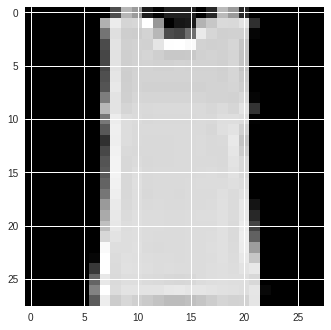

In [0]:
# Let's view some images!
import random
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28))) # reshape and plot the image
#Any row and all columns
plt.imshow(training[i,1:].reshape((28,28)),cmap = 'gray') # reshape and plot the image
label = training[i,0]
print(f'Image Label:{label}')
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

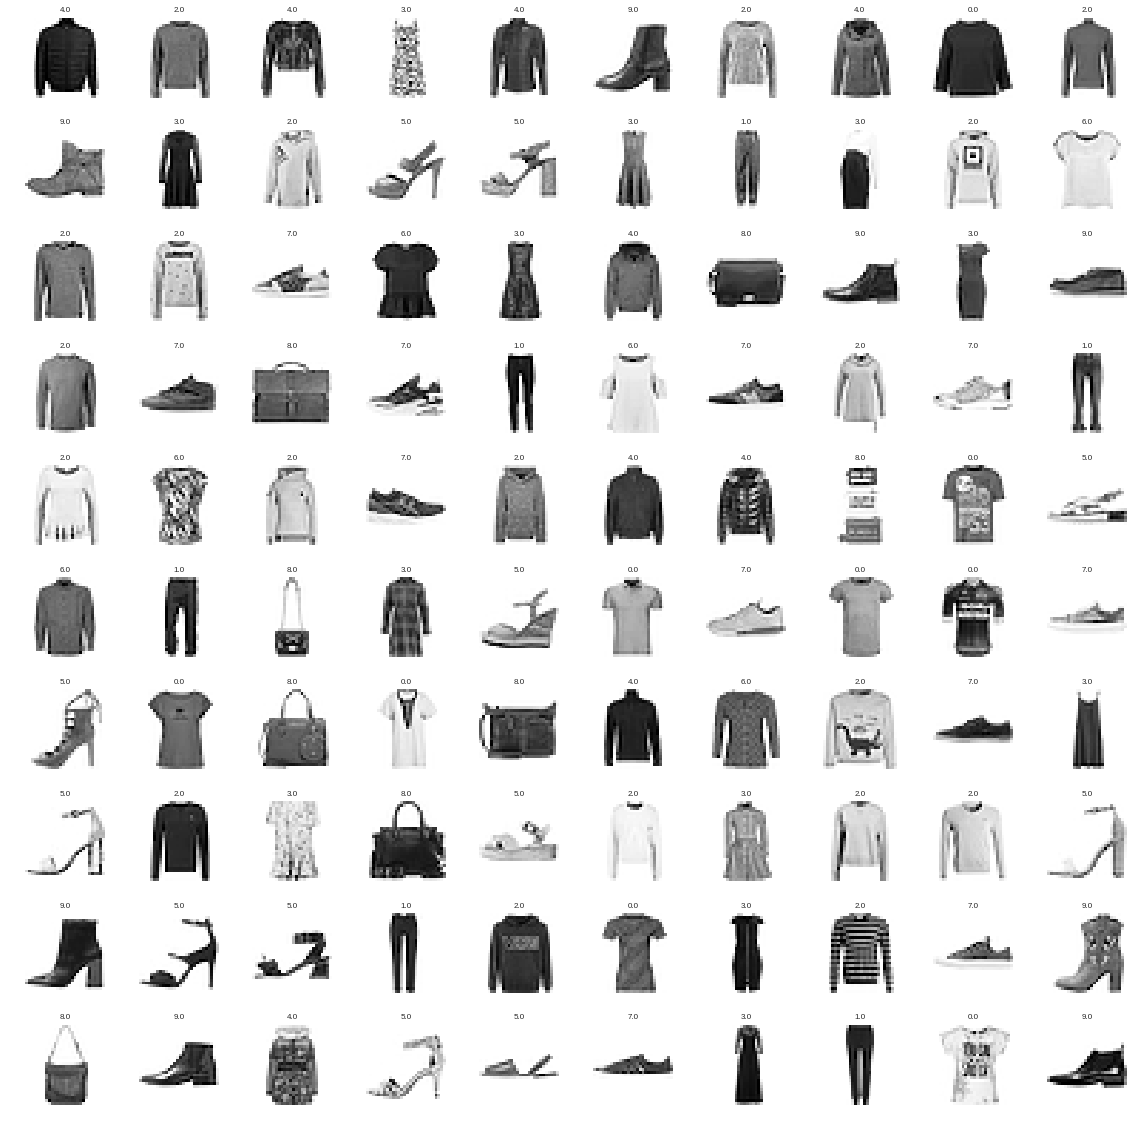

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 10 x 10 matrix into 100 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [0]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255 # Training Normalization
y_train = training[:,0]

X_test = testing[:,1:]/255   # Testing Normalization
y_test = testing[:,0]

print(X_train)
print('\n')
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00392157 0.        ]
 [0.         0.00392157 0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2,random_state =0)

In [0]:
print(f'Training Sample:{X_train.shape}')
print(f'Testing Sample:{y_train.shape}')

Training Sample:(48000, 784)
Testing Sample:(48000,)


In [0]:
# * unpack the tuple
# To make Image Network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [0]:
print(f'Training Sample:{X_train.shape}')
print(f'Test Sample Size:{X_test.shape}')
print(f'Validate Size:{X_validate.shape}')

Training Sample:(38400, 28, 28, 1)
Test Sample Size:(12000, 28, 28, 1)
Validate Size:(9600, 28, 28, 1)


In [0]:
# Import Keras Library
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam #Adam Optimizer
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
#Model
cnn_model = Sequential()

# Try 64 fliters/Kernal Detectors With Dropout
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) #Pooling Layer
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) #Flattening
cnn_model.add(Dense(output_dim = 32, activation = 'relu')) #Dense Function
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid')) #Output Layer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy']) #Adam Optimizer

In [0]:
epochs = 50 #Taking Dataset and updating the weights

history = cnn_model.fit(X_train,y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 38400 samples, validate on 9600 samples
Epoch 1/50
38400/38400 [==============================] - 6s 152us/step - loss: 0.8774 - acc: 0.7034 - val_loss: 0.5211 - val_acc: 0.8125
Epoch 2/50
38400/38400 [==============================] - 2s 54us/step - loss: 0.4690 - acc: 0.8330 - val_loss: 0.4468 - val_acc: 0.8413
Epoch 3/50
38400/38400 [==============================] - 2s 53us/step - loss: 0.4152 - acc: 0.8538 - val_loss: 0.4066 - val_acc: 0.8578
Epoch 4/50
38400/38400 [==============================] - 2s 54us/step - loss: 0.3756 - acc: 0.8684 - val_loss: 0.3755 - val_acc: 0.8667
Epoch 5/50
38400/38400 [==============================] - 2s 54us/step - loss: 0.3570 - acc: 0.8751 - val_loss: 0.3696 - val_acc: 0.8678
Epoch 6/50
38400/38400 [==============================] - 2s 54us/step - loss: 0.3463 - acc: 0.8782 - val_loss: 0.3428 - val_acc: 0.8779
Epoch 7/50
38400/38400 [==============================] - 2s 54us/step - loss: 0.3221 - acc: 0.8882 - val_loss: 0.3407 - val_acc

In [0]:
#Model
cnn_model = Sequential()

# Try 32 fliters/Kernal Detector With Dropout
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) #Pooling Layer
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) #Flattening
cnn_model.add(Dense(output_dim = 32, activation = 'relu')) #Dense Function
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid')) #Output Layer

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy']) #Adam Optimizer

epochs = 50 #Taking Dataset and updating the weights

history = cnn_model.fit(X_train,y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

# STEP #5: EVALUATING THE MODEL

In [0]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

12000/12000 [==============================] - 1s 79us/step
Test Accuracy : 0.908


[0.27569498879710835, 0.908]

In [0]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
print(predicted_classes)

[1 6 8 ... 4 9 3]


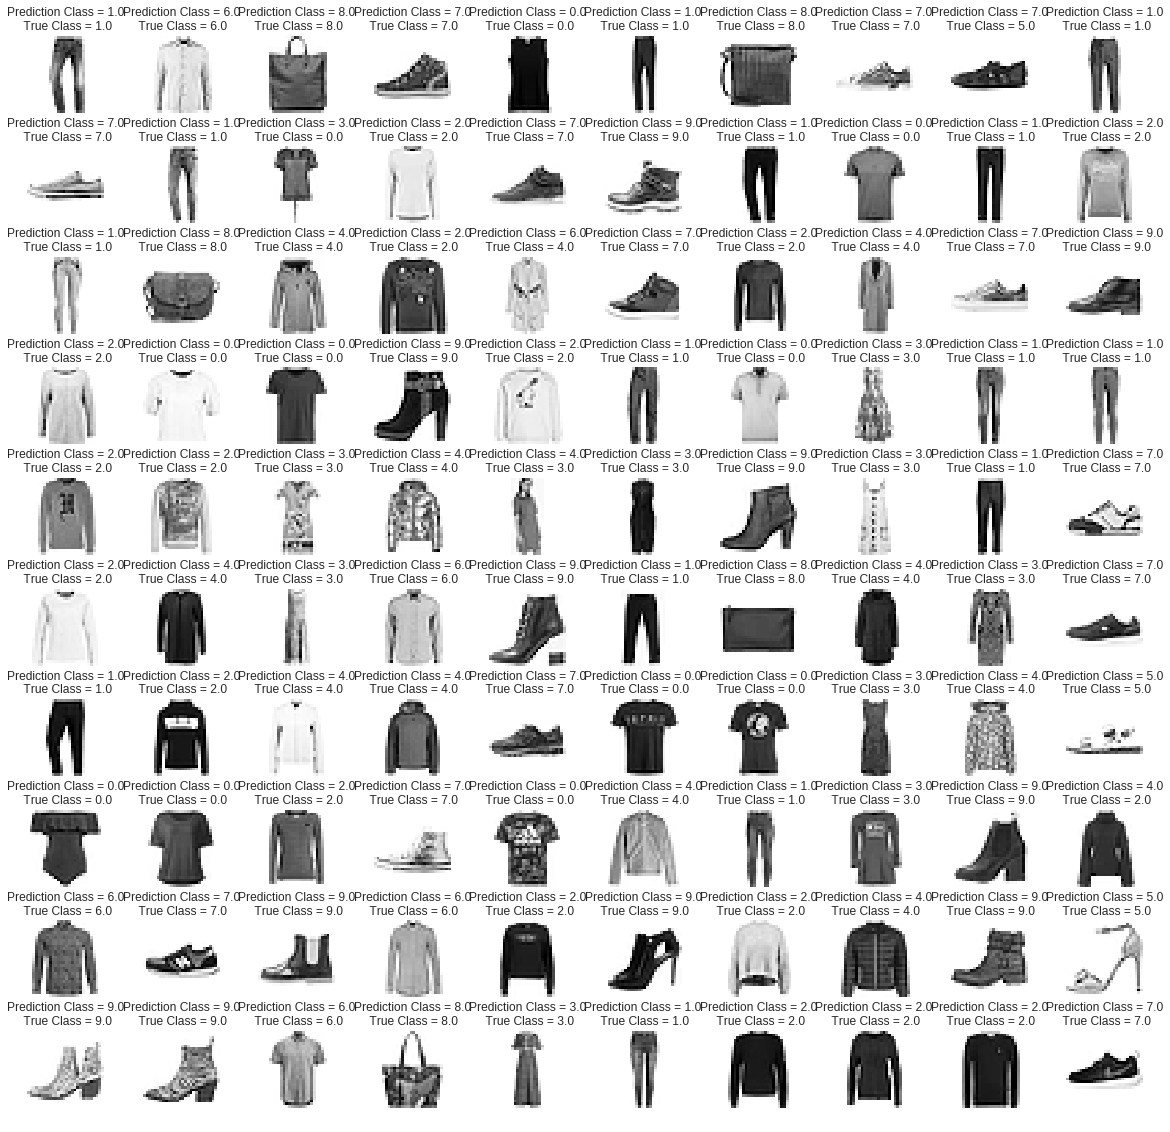

In [0]:
#Pick 100 images
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # Flatten our axis array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i])) #Prediction Label and True Label
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


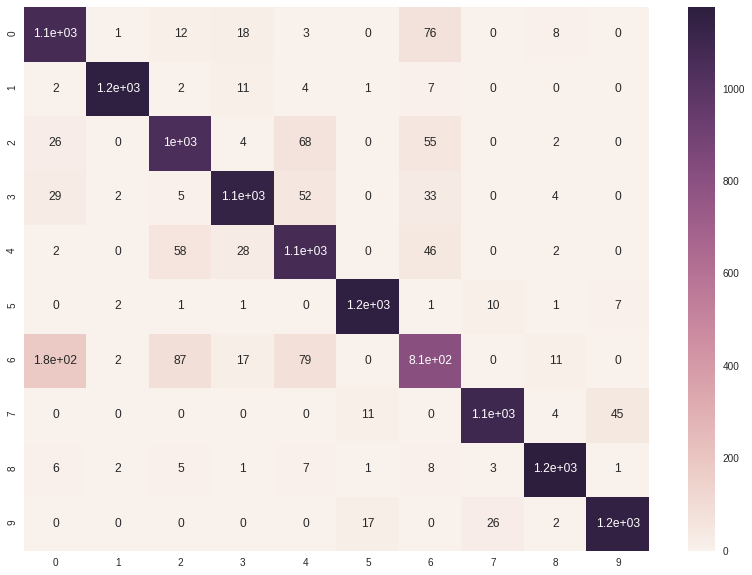

In [0]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True) # Sum the diagonal element to get the total true correct values

In [0]:
#Classification Report
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.81      0.90      0.85      1189
    Class 1       0.99      0.98      0.98      1189
    Class 2       0.86      0.87      0.87      1204
    Class 3       0.93      0.90      0.92      1260
    Class 4       0.83      0.89      0.86      1208
    Class 5       0.97      0.98      0.98      1188
    Class 6       0.78      0.68      0.73      1195
    Class 7       0.97      0.95      0.96      1160
    Class 8       0.97      0.97      0.97      1210
    Class 9       0.96      0.96      0.96      1197

avg / total       0.91      0.91      0.91     12000



#Conclusion

We get the accuracy of fashion class is 91%.Class 6(Shirt) accuracy is very less. We can improve accuracy by adding more features detectors/filters or adding a dropout.Droupout is a regularization techniques for reducing overfits in neural networks refers to dropping out units in a neural network.
